GROUP 101 PROPOSAL

A pulsar is a neutron star that rotates rapidly and emits radio-waves that are detectable by sensitive radio telescopes on earth in a periodic manner of surges, based on its rotation which affects the magnetic axis - like the pulse of the heart organ. Each pulse has a different fold shape (and varies very slightly with each rotation), and different emission patterns. Based on the radio-wave emission, we can predict whether the star is pulsar or not by seeing if there is an undisturbed pattern of periodic waves, as random noises can also be a distraction in detecting radio-wave emission. Noises can come from many sources, and many RFI (radio frequency interference) prevents accurate detection of pulsar radio-emissions. An integrated pulse profile can detect and analyze the whole, instead of a single pulse, which can be misleading. SNR is signal (of pulsar) to noise ratio. The proportion of the desired signal to the background noise. In the HTRU 2 data set, there are 16259 negative observations, and 1639 are real pulsars, for a total of 17898 observations. There are two main continuous variables that are included.

The two main continuous variables that we are basing our classification and classifier algorithm on are (to predict whether or not the observations are pulsars):

Integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version (based on longitude-axis waves) of the signal that has been averaged in both time and frequency, where the pulses are radio-wave emissions with respect to time:
The mean of the integrated pulse profile measures the frequency of complete rotations of the pulsar in a second. Most pulsars are millisecond pulsars, with a little more than a hundred rotations a second. 

Signal to noise ratio:
This measures the strength of the signal. If the SNR is high, the signal is from the pulsar. 
DM-SNR is the dispersion measure signal to noise ratio. It measures the number of free electrons between the telescope and the pulsar, then that number is averaged (integrated). The DM is the integrated column density of free electrons between an observer and a pulsar. It is a DM correction, to turn the dispersed into de-dispersed to better measure the strength of the signal.


1. Mean of the integrated profile (mean of frequency of detected rotations)
2. Standard deviation of the integrated profile. (spread)
3. Excess kurtosis of the integrated profile. (outliers)
4. Skewness of the integrated profile. (distribution of the frequency’s lack of symmetry)
5. Mean of the DM-SNR curve. (mean of dispersion measure of strength of signal)
6. Standard deviation of the DM-SNR curve. (spread)
7. Excess kurtosis of the DM-SNR curve. (outliers)
8. Skewness of the DM-SNR curve. (distribution of the strength of signal’s lack of symmetry)
9. Class (whether it is a pulsar or not),

    0 = Not Pulsar,
    1 = Pulsar
    
In this project, we will be using two specific variables to determine whether a star is pulsar or not: the mean of the integrated profile, and the mean of the DM-SNR curve. Our project only has two options for the classifier: star is a pulsar, or it is not. When both the variables are neither high nor low compared to other values in the dataset, there is a lot of noise that makes the presence of pulsar hard to predict. In our project, we will be choosing 5 new data points within this "fuzzy" hard to predict range, and predicting wether they are pulsar or not with the appropriate k nearest neighbours.


The dataset we chose came from the UCI machine learning repository, the link can be found here: https://archive.ics.uci.edu/ml/datasets/HTRU2#https://archive.ics.uci.edu/ml/datasets/HTRU2#. 
The dataset contains more columns than we will be using for our prediction. The other three columns for integrated values, and the three for the DM-SNR values are just additional information that clarifies the mean values. The standard deviation gives us the error for each mean value, we will not be taking this error into consideration for our classification. Kurtosis is essentially the probability distribution, and skewness is a measure of the asymmetry of the probability distribution. These are not variables that can be used as classifiers, their presence in the dataset is to provide information on the accuracy of the values we are interested in.


Load the Library packages: 

In [62]:
library(tidyverse)
library(repr)
library(tidymodels)

Read the data in from the web:

In [65]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
download.file(url, "pulsar_data.zip")
unzip("pulsar_data.zip")
pulsar_data<-read_csv("HTRU_2.csv", col_names = FALSE) 

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Tidy the data by assigning column names, and change the variable we want to classify to a factor:

In [69]:
rename(pulsar_data, mean_integrated = X1,
      std_integrated = X2,
      excess_kurtosis_integrated = X3,
      skewness_integrated = X4,
      mean_DMSNR = X5,
      std_DMSNR = X6,
      excess_kurtosis_DMSNR = X7,
      skewness_DMSNR = X8,
      pulsar = X9) %>%
mutate(pulsar= as.factor(pulsar))

mean_integrated,std_integrated,excess_kurtosis_integrated,skewness_integrated,mean_DMSNR,std_DMSNR,excess_kurtosis_DMSNR,skewness_DMSNR,pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


Split the data into training and testing sets:

In [64]:
pulsar_split <- initial_split(pulsar_data, prop = 0.75 , strata = pulsar)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

Summarise the data into two tables for exploratory data analysis:

In [70]:
data_summary_no <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "0") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)
data_summary_no
data_summary_yes <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "1") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)
data_summary_yes

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
8.782434,116.6267,0


mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
50.70298,56.4887,1


Each table shows the mean value for the two predictors we are using to determine whether pulsar is present or not: Mean of the integrated profile, and Mean of the DM-SNR curve. The first table shows the mean values for these two variables when pulsar is not present (pulsar = 0). The second table shows the mean values for these two variables when pulsar is present (pulsar = 1). These two tables can be compared to get a better idea of the range each classification variable falls in. 

Make a plot to visualise an exploratory data analysis:

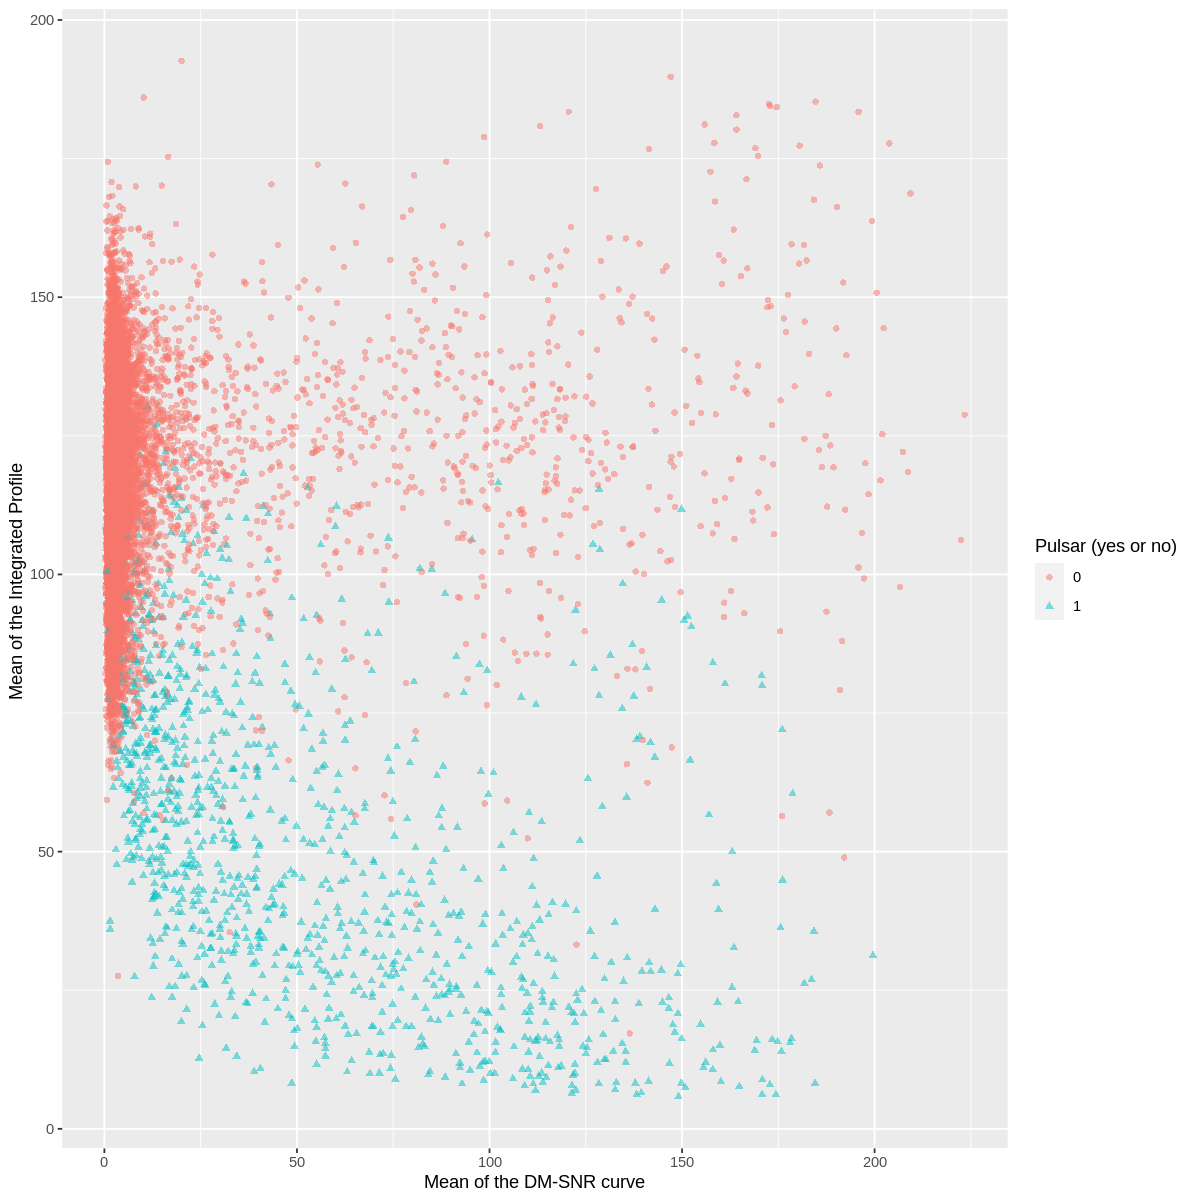

In [38]:
options(repr.plot.width=10, repr.plot.height=10)
pulsar_plot <- pulsar_training %>%
ggplot(aes(x=mean_DMSNR, y= mean_integrated, colour= pulsar, shape = pulsar)) +
geom_point(alpha = 0.5) +
labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)", shape = "Pulsar (yes or no)")
pulsar_plot

The scatter plot plots the two testable variables against each other, with pulsar being present or not as the different coloured and shaped points. This plot allows us to visualise the ranges for the presence of pulsar, and make very rough predictions without further help from R.

To evaluate if a pulsar candidate is likely to be a pulsar or merely background RFI noise, we will use the K-nearest neighbour classification algorithm. To determine if candidates are pulsars or not, we shall consider the following factors:
To attempt and decide which variables are the most/least relevant and which ones we should add to our model, we will utilise the forward selection approach. We might also use the Best Subset Selection process to further refine the list of variables if there are any variables about which we are unsure. Best Subset Selection should be avoided because it is time-consuming and could be quite challenging to implement with 8 different variables.

Our analysis will consist of using these variables (standardized and scaled) to try and predict candidates using the training dataset to train a model that uses the K-nearest neighbor classification model. We will use the tidymodel package to perform classification of the dataset.
In order to classify the dataset, we'll utilise the tidymodel programme.
To find the ideal value of K to employ in our model, we shall cross-validate.
In order to assess and remark on the model's correctness, we will try to apply it to our testing dataset when we have done developing and fine-tuning the model on the training dataset. The final step is to evaluate our model's performance and offer opinions on its applicability and viability.

We anticipate that our code will eventually be able to distinguish between pulsars and non-pulsar stars among the 17,898 provided possibilities.This might be very helpful in the categorization and potential screening of prospective pulsar candidates, depending on the precision and effectiveness of our model. The model's usefulness is predicated on how accurate it is given our testing dataset.